In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [ ]:
#Load Denver Data
denver = pd.read_csv('denver.csv')
print(denver.head())

In [ ]:
#Load Census Data
Census = pd.read_csv('Census (1).csv')
print(Census.head())

In [ ]:
#Load Neighborhoods Data
Neighborhood = gpd.read_file('neighborhoods.shp')
print(Neighborhood.head())

In [ ]:
#Check all the info and describe data
print(denver.info())
print(denver.describe())

print(Census.info())
print(Census.describe())

print(Neighborhood.info())
print(Neighborhood.describe())

In [79]:

# Calculate the proportion of the target demographic (18-34 years old)
Census['TARGET_DEMOGRAPHIC'] = Census['AGE_18_TO_34'] / Census['POPULATION_2010']

# Calculate the proportion of high-income households
Census['HIGH_INCOME_PROPORTION'] = Census['NUM_HHLD_100K+'] / Census['NUM_HOUSEHOLDS']

# Drop rows where 'HIGH_INCOME_PROPORTION' is NaN and create a copy
Census = Census.dropna(subset=['HIGH_INCOME_PROPORTION']).copy()


In [80]:
# Sort neighborhoods by the proportion of the target demographic and high-income households
sorted_census = Census.sort_values(by=['TARGET_DEMOGRAPHIC', 'HIGH_INCOME_PROPORTION'], ascending=False)

# Select the top three neighborhoods
top_three_neighborhoods = sorted_census.head(3)
print(top_three_neighborhoods[['NBHD_NAME', 'TARGET_DEMOGRAPHIC', 'HIGH_INCOME_PROPORTION']])

             NBHD_NAME  TARGET_DEMOGRAPHIC  HIGH_INCOME_PROPORTION
63          University            0.616960                0.263634
8         Capitol Hill            0.562551                0.112657
46  North Capitol Hill            0.556071                0.262270


-20 -30 0
-50 -30 1
50 50 2


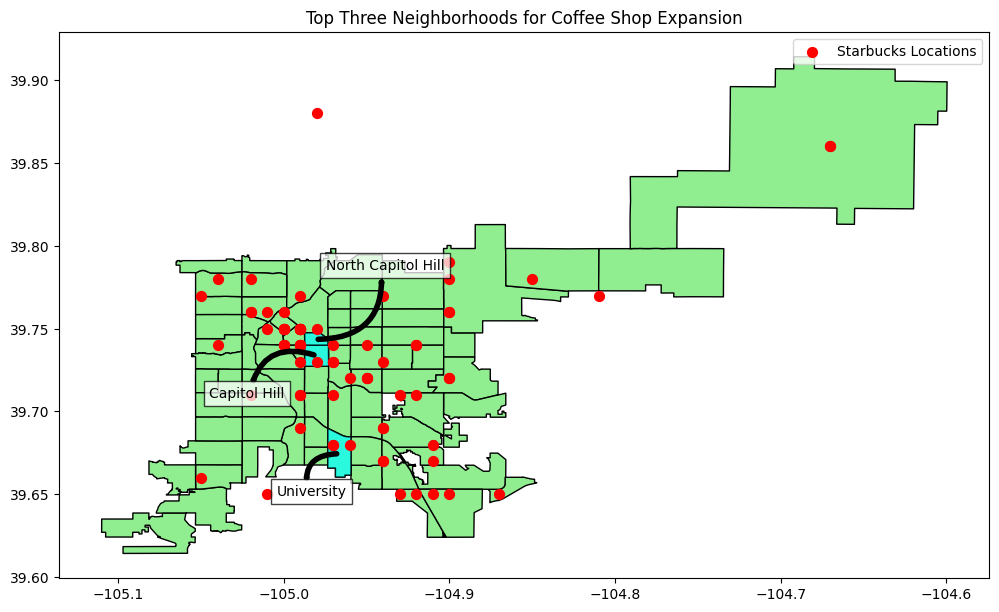

In [112]:
# Load neighborhoods GeoDataFrame
neighborhoods = gpd.read_file('Neighborhoods.shp')
 
# Merge the top three neighborhoods with the neighborhoods GeoDataFrame
top_three_gdf = neighborhoods.merge(top_three_neighborhoods, on='NBHD_NAME')
 
# Plot neighborhoods and highlight the top three
fig, ax = plt.subplots(figsize=(12, 12))
neighborhoods.plot(ax=ax, color='lightgreen', edgecolor='black')
top_three_gdf.plot(ax=ax, color='cyan', edgecolor='black', alpha=0.7)
 
# Plot Starbucks locations
denver_gdf = gpd.GeoDataFrame(
    denver,
    geometry=gpd.points_from_xy(denver.Longitude, denver.Latitude)
)
denver_gdf.plot(ax=ax, color='red', markersize=50, label='Starbucks Locations')
 
offsets = {
    0: (-20, -30),  # Moves up-left
    1: (-50, -30),        # Moves down-right
    2 : (50, 50)          # Moves down-left
}
arrow_Off = {
   
    0: (-0.02, -0.02),  # Moves up-left
    1: (-0.04, -0.02),        # Moves down-right
    2 : (0.04, 0.04)          # Moves down-left
 
}
 
index = 0

# Annotate the top three neighborhoods with their names
for x, y, label in zip(top_three_gdf.geometry.centroid.x, top_three_gdf.geometry.centroid.y, top_three_gdf.NBHD_NAME):
    if pd.notna(label):  # Check for NaN values
        offset_x, offset_y = offsets.get(index, (10, -30))  # Default offset if missing
        print(offset_x,offset_y,index)
        ax.annotate(label, xy=(x, y), xytext=(offset_x, offset_y), textcoords='offset points',
                     ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.75))
        # Add an arrow pointing to the centroid
       
        arrow_x, arrow_y = arrow_Off.get(index, (10, -30))  # Default offset if missing
        arrow = FancyArrowPatch((x, y), (x+arrow_x, y+arrow_y),
                                   connectionstyle="arc3,rad=.5",
                                   arrowstyle='->', color='black', lw=4)
        ax.add_patch(arrow)
        index += 1
 
 
plt.title('Top Three Neighborhoods for Coffee Shop Expansion')
plt.legend()
plt.show()
 
 
# plt.title('Top Three Neighborhoods for Coffee Shop Expansion')
# plt.legend()
# plt.show()
 

In [114]:
# Summary of Analysis
print("\nSummary of Analysis:")
print("The University Neighborhood has the highest proportion of the target demographic (61.7%) and high-income households (26.4%).")
print("North Capitol Hill also shows strong potential with a high-income household proportion of 26.2%.")
print("Capitol Hill, while having a slightly lower high-income proportion (11.3%), still offers a significant target demographic presence (56.3%).")

# Recommendations
print("\nRecommendations:")
print("Focus on the University Neighborhood first due to its high target demographic and affluent household presence.")
print("Consider North Capitol Hill and Capitol Hill as secondary options, balancing demographic fit and economic potential.")


Summary of Analysis:
The University Neighborhood has the highest proportion of the target demographic (61.7%) and high-income households (26.4%).
North Capitol Hill also shows strong potential with a high-income household proportion of 26.2%.
Capitol Hill, while having a slightly lower high-income proportion (11.3%), still offers a significant target demographic presence (56.3%).

Recommendations:
Focus on the University Neighborhood first due to its high target demographic and affluent household presence.
Consider North Capitol Hill and Capitol Hill as secondary options, balancing demographic fit and economic potential.


In [ ]:
# Check for missing values
print(census.isnull().sum())
print(neighborhoods.isnull().sum())

# Check data types
print(census.dtypes)
print(neighborhoods.dtypes)







# Check for missing values in each dataset
print("Missing values in census data:")
print(census.isnull().sum())

print("\nMissing values in Denver data:")
print(denver_data.isnull().sum())

print("\nMissing values in neighborhoods data:")
print(neighborhoods.isnull().sum())

# Remove duplicates from each dataset
census = census.drop_duplicates()
denver_data = denver_data.drop_duplicates()
neighborhoods = neighborhoods.drop_duplicates(subset='NBHD_ID')  # Assuming 'NBHD_ID' is the column for neighborhood IDs

